# 环境说明

In [1]:
!python -V

Python 3.11.5


In [2]:
import lifelines
import pandas

In [3]:
lifelines.__version__

'0.30.0'

In [4]:
pandas.__version__

'2.1.1'

# 代码实现

In [5]:
import pandas as pd
from lifelines import CoxPHFitter

In [9]:
df = pd.read_csv("data/Cox_dataset.csv")

In [13]:
df.head()

,var1,var2,var3,T,E
0,0.595170,1.143472,1.571079,14.785652,1
1,0.209325,0.184677,0.356980,7.335846,1
2,0.693919,0.071893,0.557960,5.269797,1
3,0.443804,1.364646,0.374221,11.684092,1
4,1.613324,0.125566,1.921325,7.639492,1


In [14]:
cph = CoxPHFitter()
cph.fit(df, duration_col='T', event_col='E')

<lifelines.CoxPHFitter: fitted with 200 total observations, 11 right-censored observations>

In [21]:
cph.print_summary(decimals=5)

<lifelines.CoxPHFitter: fitted with 200 total observations, 11 right-censored observations>
             duration col = 'T'
                event col = 'E'
      baseline estimation = breslow
   number of observations = 200
number of events observed = 189
   partial log-likelihood = -807.61971
         time fit was run = 2025-02-07 01:42:58 UTC

---
             coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                          
var1      0.22223    1.24885    0.07429          0.07663          0.36783              1.07964              1.44459
var2      0.05096    1.05228    0.08289         -0.11150          0.21342              0.89449              1.23790
var3      0.21832    1.24398    0.07580          0.06975          0.36688              1.07224              1.44323

            cmp to       z       p   -log2(p)
covariate                                    
var1       0.00000 2.99143 0.00278    8.49239
var2       0.00000 0.61477 0.53871    0.89242
var3       0.00000 2.88014 0.00397    7.97485
---
Concordance = 0.57987
Partial AIC = 1621.23941
log-likelihood ratio test = 15.53964 on 3 df
-log2(p) of ll-ratio test = 9.47110

<Axes: xlabel='HR (95% CI)'>

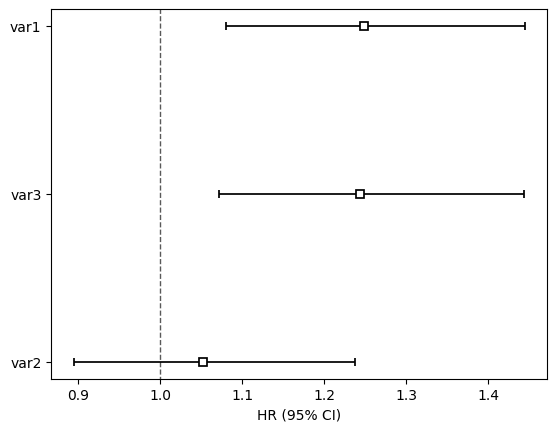

In [17]:
cph.plot(hazard_ratios=True)